# Wikipedia Talk Pages - year of 2015
**Rima Edris**  318736725

**Amal Khatib**   318388899

# to minimise the runtime you can running only the : section 1 -> (then) section 5

# section 1 : 

1. upload the libraries 
2. import the libraries 
3. create the classes and the list to upload the data

**Upload The Libraries To Use**

In [ ]:

!pip install -U featuretools
!pip install -U -q PyDrive
!pip3 install wikipedia-api
!pip install wikipedia
!pip install -U spacy
!python -m spacy validate
!pip install -U spacy[cuda92]
!python -m spacy download en
!python -m spacy download en_core_web_sm
!pip install -U pip setuptools wheel
!python -m venv .env
!source .env/bin/activate
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
!pip3 install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz
!python -m spacy download en_core_web_sm
!pip install tabulate
#https://spacy.io/models/en#en_core_web_sm
#https://pypi.org/project/gender-guesser/

     |████████████████████████████████| 307kB 5.4MB/s 
     |████████████████████████████████| 9.9MB 8.7MB/s 
     |████████████████████████████████| 296kB 46.7MB/s 
     |████████████████████████████████| 645kB 42.1MB/s 
     |████████████████████████████████| 727kB 41.1MB/s 
     |████████████████████████████████| 122kB 54.4MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.5 which is incompatible.
ERROR: distributed 2021.6.2 has requirement cloudpickle>=1.5.0, but you'll have cloudpickle 1.3.0 which is incompatible.
ERROR: distributed 2021.6.2 has requirement dask==2021.06.2, but you'll have dask 2.12.0 which is incompatible.
  Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
  Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8
  Found existing installation: PyYAML 3.13
    Uninstalling P

  Created wheel for wikipedia-api: filename=Wikipedia_API-0.5.4-cp37-none-any.whl size=13477 sha256=7e0fb005ecd86b6bea8a6f1cb32fc08ada2022600da5525d3497f24e41c14cdc
  Stored in directory: /root/.cache/pip/wheels/bf/40/42/ba1d497f3712281b659dd65b566fc868035c859239571a725a
Successfully built wikipedia-api
  Created wheel for wikipedia: filename=wikipedia-1.4.0-cp37-none-any.whl size=11697 sha256=070cca2b04a62177bdb388a3dde6db3c11329e65def37cfdb7491ceb45db0e40
  Stored in directory: /root/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia
     |████████████████████████████████| 12.8MB 212kB/s 
     |████████████████████████████████| 51kB 6.0MB/s 
     |████████████████████████████████| 460kB 39.7MB/s 
     |████████████████████████████████| 9.1MB 32.6MB/s 
     |████████████████████████████████| 624kB 31.7MB/s 
  Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.

**Import the libraries**

In [ ]:
import csv
import itertools
import copy
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import wikipediaapi
import wikipedia

 **Create the classes**

In [ ]:
class Use_r( object ):  
    def __init__(self, userID, userName, admin, gender): 
        self.userID = userID
        self.userName = userName
        self.admin = admin
        self.gender= gender
# creating class of the user
class User( object ):  
    def __init__(self, userID, userName, admin, gender): 
        self.userID = userID
        self.userName = userName
        self.admin = admin
        self.gender= gender
    def __init__(self, userID, userName, admin): 
        self.userID = userID
        self.userName = userName
        self.admin = admin
        self.gender= "unknown"
    

# creating class of the wiki-talk page by api
class PageAPI( object ): 
    def __init__(self, pageID, pageTitle, pageTopic): 
        self.pageID = pageID
        self.pageTitle = pageTitle
        self.pageTopic = pageTopic
        self.author_user=""
        self.author_gender=""

class Pag_e( object ): 
    def __init__(self, author,gender_author, pageID, pageTitle,pageTopic): 
        self.author_user=author
        self.author_gender=gender_author
        self.pageID = pageID
        self.pageTitle = pageTitle
        self.pageTopic = pageTopic
# creating class of the wiki-talk page
class Page( object ): 
    def __init__(self, author,gender_author, pageID, pageTitle,pageTopic): 
        self.author_user=author
        self.author_gender=gender_author
        self.pageID = pageID
        self.pageTitle = pageTitle
        self.pageTopic = pageTopic
    def __init__(self, pageID, pageTitle): 
        self.author_user=""
        self.author_gender=""
        self.pageID = pageID
        self.pageTitle = pageTitle
        self.pageTopic = ""
        
# creating class of the user comment on page
class UserPage( User): 
    def __init__(self, pageTitle, userID, userName, admin): 
        self.pageTitle = pageTitle
        # invoking the __init__ of the parent class 
        User.__init__(self, userID, userName, admin) 
        
class WikiTal_k(User, Page):
    def __init__(self, rev_id, comment, status_comment, timestamp, bot, userID, userName, admin,gender,author,gender_author, pageID, pageTitle,pageTopic): 
        self.rev_id = rev_id
        self.source_title="" 
        self.comment = comment
        self.status_comment= status_comment
        self.timestamp = timestamp   
        self.bot = bot
         # invoking the __init__ of the parent class 
        self.user= Use_r(userID, userName, admin,gender) 
        self.page= Pag_e(author,gender_author, pageID, pageTitle,pageTopic)
        self.color=""
# creating class of the wiki-talk- comment, users, talk pages
class WikiTalk(User, Page):
    def __init__(self, rev_id, comment, status_comment, timestamp, bot, userID, userName, admin,gender,author,gender_author, pageID, pageTitle,pageTopic): 
        self.rev_id = rev_id
        self.source_title="" 
        self.comment = comment
        self.status_comment= status_comment
        self.timestamp = timestamp   
        self.bot = bot
         # invoking the __init__ of the parent class 
        self.user= User(userID, userName, admin,gender) 
        self.page= Page(author,gender_author, pageID, pageTitle,pageTopic)
        self.color=""
    def __init__(self,rev_id, comment, timestamp, pageID, pageTitle, userID, userName, bot, admin): 
        self.rev_id = rev_id
        self.source_title="" 
        self.comment = comment
        self.status_comment= 0
        self.timestamp = timestamp   
        self.bot = bot
         # invoking the __init__ of the parent class 
        self.user= User(userID, userName, admin) 
        self.page= Page(pageID, pageTitle)
        self.color="" 
class edges():
  def __init__(self, user, author):
    self.source=user
    self.target=author

class author():
  def __init__(self, name, gender, pageTopic):
    self.name=name
    self.gender=gender
    self.pageTopic=pageTopic
    self.count=0

class author_node():
  def __init__(self, name, gender):
    self.name=name
    self.gender=gender
    self.count=0

class user_node():
  def __init__(self, name,gender, comment):
    self.name=name
    self.gender=gender
    self.count=0
    self.comment=comment

class node_color():
  def __init__(self, name,color):
    self.name=name
    self.color=color
       

In [ ]:
# creating the lists      
list_of_users = []
list_of_pages = []
list_of_wikiTalk = []


# Section 2

* upload all the data we have to the lists, before we used the wikipedia API to work on the data

In [ ]:
# --------------------------------------------------------- upload the "chunk_0.csv" file -------------------------------------------------------------
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth_0 = GoogleAuth()
gauth_0.credentials = GoogleCredentials.get_application_default()
drive_0 = GoogleDrive(gauth_0)
id=1pdmq7Q3wWrSxOuevMuGz-z8D7L9na4KB
link_0 = 'https://drive.google.com//file/d/open?id=1L8qMefACti15ga0aAvti1_YQo-IGFHq3' # The shareable link
fluff_0, id_0 = link_0.split('=')
print (id_0) # Verify that you have everything after '='
downloaded_0 = drive_0.CreateFile({'id':id_0}) 
downloaded_0.GetContentFile('chunk_0.csv')  
df_0 = pd.read_csv('chunk_0.csv',delimiter="\t")
# Dataset is now stored in a Pandas Dataframe

# --------------------------------------------------------- upload the "chunk_1.csv" file -------------------------------------------------------------
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth_1 = GoogleAuth()
gauth_1.credentials = GoogleCredentials.get_application_default()
drive_1 = GoogleDrive(gauth_1)

link_1 = 'https://drive.google.com//file/d/open?id=1eDx4nFFC9e28xyUeb_NLE4c5C7x9ibRv' # The shareable link

fluff_1, id_1 = link_1.split('=')
print (id_1) # Verify that you have everything after '='
downloaded_1 = drive_1.CreateFile({'id':id_1}) 
downloaded_1.GetContentFile('chunk_1.csv')  
df_1 = pd.read_csv('chunk_1.csv',delimiter=',')
# Dataset is now stored in a Pandas Dataframe
# --------------------------------------------------------- upload the "chunk_2.csv" file -------------------------------------------------------------

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth_2 = GoogleAuth()
gauth_2.credentials = GoogleCredentials.get_application_default()
drive_2 = GoogleDrive(gauth_2)

link_2 = 'https://drive.google.com//file/d/open?id=1xKegqanP9yiEKbPmqH1uZtBtahZqdO_6' # The shareable link
fluff_2, id_2 = link_2.split('=')
print (id_2) # Verify that you have everything after '='
downloaded_2 = drive_2.CreateFile({'id':id_2}) 
downloaded_2.GetContentFile('chunk_2.csv')  
df_2 = pd.read_csv('chunk_2.csv',delimiter=',')
# Dataset is now stored in a Pandas Dataframe

# --------------------------------------------------------- upload the "chunk_3.csv" file -------------------------------------------------------------

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth_3 = GoogleAuth()
gauth_3.credentials = GoogleCredentials.get_application_default()
drive_3 = GoogleDrive(gauth_3)

link_3 = 'https://drive.google.com//file/d/open?id=1tldrLmnNOR_WJXQ67DQPFJ1YJOxp7rTL' # The shareable link
fluff_3, id_3 = link_3.split('=')
print (id_3) # Verify that you have everything after '='
downloaded_3 = drive_3.CreateFile({'id':id_3}) 
downloaded_3.GetContentFile('chunk_3.csv')  
df_3 = pd.read_csv('chunk_3.csv',delimiter=',')
# Dataset is now stored in a Pandas Dataframe

# --------------------------------------------------------- upload the "chunk_4.csv" file -------------------------------------------------------------

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth_4 = GoogleAuth()
gauth_4.credentials = GoogleCredentials.get_application_default()
drive_4 = GoogleDrive(gauth_4)

link_4 = 'https://drive.google.com//file/d/open?id=1I6zGiP7HK9FZjw255OgfXzx4pJ0XY5Ij' # The shareable link
fluff_4, id_4 = link_4.split('=')
print (id_4) # Verify that you have everything after '='
downloaded_4 = drive_4.CreateFile({'id':id_4}) 
downloaded_4.GetContentFile('chunk_4.csv')  
df_4 = pd.read_csv('chunk_4.csv',delimiter=',')
# Dataset is now stored in a Pandas Dataframe

# --------------------------------------------------------- upload the "chunk_5.csv" file -------------------------------------------------------------
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth_5 = GoogleAuth()
gauth_5.credentials = GoogleCredentials.get_application_default()
drive_5 = GoogleDrive(gauth_5)

link_5 = 'https://drive.google.com//file/d/open?id=1YJb_ieS6kou7V46owdgQEE4QW1PN3VUU' # The shareable link
fluff_5, id_5 = link_5.split('=')
print (id_5) # Verify that you have everything after '='
downloaded_5 = drive_5.CreateFile({'id':id_5}) 
downloaded_5.GetContentFile('chunk_5.csv')  
df_5 = pd.read_csv('chunk_5.csv',delimiter=',')
# Dataset is now stored in a Pandas Dataframe

# --------------------------------------------------------- upload the "chunk_6.csv" file -------------------------------------------------------------
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth_6 = GoogleAuth()
gauth_6.credentials = GoogleCredentials.get_application_default()
drive_6 = GoogleDrive(gauth_6)

link_6 = 'https://drive.google.com//file/d/open?id=1Lp9MOVXM6CDC6z0wul-aZ3mLjTBam2BK' # The shareable link

fluff_6, id_6 = link_6.split('=')
print (id_6) # Verify that you have everything after '='
downloaded_6 = drive_6.CreateFile({'id':id_6}) 
downloaded_6.GetContentFile('chunk_6.csv')  
df_6 = pd.read_csv('chunk_6.csv',delimiter=',')
# Dataset is now stored in a Pandas Dataframe

# --------------------------------------------------------- upload the "chunk_7.csv" file -------------------------------------------------------------


 **loading THE DATA to the lists** 

In [ ]:

# adding the objects to the lists from the files
count = 0

for index,row in df_0.iterrows():
    if len(row)==10 and count != 0:
      list_of_wikiTalk.append( WikiTalk(row['rev_id'], row['comment'], row['timestamp'],row['page_id'], row['page_title'], row['user_id'], row['user_text'],row['bot'], row['admin']) )
    count = count + 1
print("finish 0 ")

count = 0
for index,row in df_1.iterrows():
    if len(row)==10 and count != 0:
      list_of_wikiTalk.append( WikiTalk(row['rev_id'], row['comment'], row['timestamp'],row['page_id'], row['page_title'], row['user_id'], row['user_text'],row['bot'], row['admin']) )
    count = count + 1
print("finish 1 ")

count = 0
for index,row in df_2.iterrows():
    if len(row)==10 and count != 0:
      list_of_wikiTalk.append( WikiTalk(row['rev_id'], row['comment'], row['timestamp'],row['page_id'], row['page_title'], row['user_id'], row['user_text'],row['bot'], row['admin']) )
      #list_of_users.append( User(row['user_id'], row['user_text'], row['admin']))
      #list_of_pages.append( Page(row['page_id'], row['page_title']))
      #list_of_userPage.append(UserPage(row['page_title'], row['user_id'], row['user_text'], row['admin']))
    count = count + 1
print("finish 2 ")

count = 0
for index,row in df_3.iterrows():
    if len(row)==10 and count != 0:
      list_of_wikiTalk.append( WikiTalk(row['rev_id'], row['comment'], row['timestamp'],row['page_id'], row['page_title'], row['user_id'], row['user_text'],row['bot'], row['admin']) )
      #list_of_users.append( User(row['user_id'], row['user_text'], row['admin']))
      #list_of_pages.append( Page(row['page_id'], row['page_title']))
      #list_of_userPage.append(UserPage(row['page_title'], row['user_id'], row['user_text'], row['admin']))
    count = count + 1
print("finish 3 ")

count = 0
for index,row in df_4.iterrows():
    if len(row)==10 and count != 0:
      list_of_wikiTalk.append( WikiTalk(row['rev_id'], row['comment'], row['timestamp'],row['page_id'], row['page_title'], row['user_id'], row['user_text'],row['bot'], row['admin']) )
      #list_of_users.append( User(row['user_id'], row['user_text'], row['admin']))
      #list_of_pages.append( Page(row['page_id'], row['page_title']))
      #list_of_userPage.append(UserPage(row['page_title'], row['user_id'], row['user_text'], row['admin']))
    count = count + 1
print("finish 4 ")

count = 0
for index,row in df_5.iterrows():
    if len(row)==10 and count != 0:
      list_of_wikiTalk.append( WikiTalk(row['rev_id'], row['comment'], row['timestamp'],row['page_id'], row['page_title'], row['user_id'], row['user_text'],row['bot'], row['admin']) )
      #list_of_users.append( User(row['user_id'], row['user_text'], row['admin']))
      #list_of_pages.append( Page(row['page_id'], row['page_title']))
      #list_of_userPage.append(UserPage(row['page_title'], row['user_id'], row['user_text'], row['admin']))
    count = count + 1
print("finish 5 ")

count = 0
for index,row in df_6.iterrows():
    if len(row)==10 and count != 0:
      list_of_wikiTalk.append( WikiTalk(row['rev_id'], row['comment'], row['timestamp'],row['page_id'], row['page_title'], row['user_id'], row['user_text'],row['bot'], row['admin']) )
      #list_of_users.append( User(row['user_id'], row['user_text'], row['admin']))
      #list_of_pages.append( Page(row['page_id'], row['page_title']))
      #list_of_userPage.append(UserPage(row['page_title'], row['user_id'], row['user_text'], row['admin']))
    count = count + 1
print("finish 6 ")
#with open("https://drive.google.com/file/d/1L8qMefACti15ga0aAvti1_YQo-IGFHq3/view?usp=sharing") as tsvfile:
#    tsvreader = csv.reader(tsvfile, delimiter="\t")
 #   for line in tsvreader:
  #      if len(line)==10 and count != 0:
   #         list_of_wikiTalk.append( WikiTalk(line[0], line[1], line[3],line[4], line[5], line[6], line[7],line[8], line[9]) )
    #        list_of_users.append( User(line[6], line[7],line[9]))
     #       list_of_pages.append(Page(line[4], line[5]))
      #      list_of_userPage.append(UserPage(line[5], line[6], line[7],line[9]))
       # count = count + 1

In [ ]:
print(len(list_of_wikiTalk)) 

170726


# Section 3: using wikipedia API: 


*   get the titles of the articles
*   get the authors of the articles
*   get the gender of the users






**upload the titles from the titles file**


> we are already ran the wekipedia API, so we saved the results in the titles file to minimize the runtime




**Extract the title of the article by the API of Wikipedia**

In [ ]:
# *********** IMPORTANT  *********
# can add the file titles.text and not run this func 
# so run the function below this function
#https://www.mediawiki.org/wiki/API:Revisions
# topic : https://predictivehacks.com/lda-topic-modelling-with-gensim/

list_of_pages_titles=[]
def get_title_from_wikipedia(page1):
        try:
           theTitle = wikipedia.page(page1).title
           return (theTitle)
        except  Exception as e:
           return (page1 )

for obj in list_of_wikiTalk:
    title= get_title_from_wikipedia(obj.page.pageTitle)
    obj.page.pageTitle=title
    print(title)
  
print(" *** Finish ***")



72 (number)
Conversion (chemistry)
Conversion (chemistry)
Convair F-106 Delta Dart
Mikeboothroyd
Najam2202
Dornier Do 217
Arado Ar 234
Nintendo 64
Nintendo 64


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Streaming output truncated to the last 5000 lines.
Drumlanrig Castle
The Fancy Pants Adventures
Mleeb~enwiki
English Wikipedia
Dr.strange~enwiki
Philip Klutznick
Matthieu Houriet
Coco12~enwiki
DatKy~enwiki
Silversink
FlyARP~enwiki
Montenegro
Asdf01~enwiki
Lockheed C-130 Hercules
Vedanta
201 (number)
Sqrnookle
Webmm~enwiki
Arjayay
Arjayay
Arjayay
Arjayay
Arjayay
Arjayay
Arjayay
Arjayay
Arjayay
Arjayay
Arjayay
Arjayay
Arjayay
Arjayay
Ebisumaru~enwiki
SKUD 18
Cuzkatzimhut
Cuzkatzimhut
Romaine
Waldragkeron
Derekcslater
Anysound~enwiki
Lonelyprince~enwiki
Dzur~enwiki
Pennsylvania Railroad
Pennsylvania Railroad
Pennsylvania Railroad
List of Dallas (1978 TV series) episodes
Peter Deer
Casablanca
Modelmight~enwiki
Boosie Badazz
IJA
IJA
IJA
Bob-hund~enwiki
Meet the Robinsons
Meet the Robinsons
Meet the Robinsons
Meet the Robinsons
Meet the Robinsons
Meet the Robinsons
Meet the Robinsons
Meet the Robinsons
Meet the Robinsons
Meet the Robinsons
Meet the Robinsons
Meet the Robinsons
Meet the Robin

**Using the API of Wikipedia to find the authors of the articles**

In [ ]:
# find the author of the article by using Wikipedia API
import requests
count=0
S = requests.Session()
URL = "https://www.mediawiki.org/w/api.php"
for obj_1 in list_of_wikiTalk:
  t1= obj_1.page.pageTitle
  count=count+1
  PARAMS_1 = {
    "action": "query",
    "prop": "revisions",
    "titles": t1,
    "rvprop": "timestamp|user|comment|content",
    "rvslots": "main",
    "formatversion": "2",
    "format": "json"
  }
  
  R_1 = S.get(url=URL, params=PARAMS_1)
  DATA_1 = R_1.json()
  
  PAGES = DATA_1["query"]["pages"]
  for p_age in PAGES:
    try:
        #print(p_age.get('revisions')[0].get('user'))
     # the=page.get('revisions')
      #for t in the:
        #obj_1.page.author_user=t.get('user')
        obj_1.page.author_user=p_age.get('revisions')[0].get('user')
        print(obj_1.page.author_user)
        
    except Exception as e: 
       list_of_wikiTalk.remove(obj_1)


*
Cronolio
*
*
Jdforrester (WMF)
*
*
Cronolio
*
*
Cronolio
*
*
Mortense
*
*
Nemo bis
*
*
Nemo bis
*
*
Nemo bis
*
*
Cronolio
*
*
Elitre (WMF)
*
*
Mortense
*
*
Cronolio
*
*
Lorenzo Fiocco
*
*
Sergey Chernyshev
*
*
Mattflaschen-WMF
*
*
Cronolio
*
*
Cronolio
*
*
Jdforrester (WMF)
*
*
Cronolio
*
*
Cronolio
*
*
Mortense
*
*
Nemo bis
*
*
Nemo bis
*
*
Nemo bis
*
*
Cronolio
*
*
Elitre (WMF)
*
*
Mortense
*
*
Cronolio
*
*
Lorenzo Fiocco
*
*
Sergey Chernyshev
*


**The function to extract the gender of each user by the API**

In [ ]:
#https://www.mediawiki.org/wiki/API:Revisions
# https://www.mediawiki.org/wiki/Category:MediaWiki_action_API
# get the genders of the users by using Wikipedia API
import requests
count8=0
S = requests.Session()

URL = "https://en.wikipedia.org/w/api.php"
for user in list_of_wikiTalk:
  u1=user.user.userName
  PARAMS = {
    "action": "query",
    "format": "json",
    "list": "users",
    "ususers": u1,
    "usprop": "blockinfo|groups|editcount|registration|emailable|gender"
  }

  R = S.get(url=URL, params=PARAMS)
  DATA = R.json()

  USERS = DATA["query"]["users"]

  for u in USERS:
    count8=count8+1
    user.user.gender= 'unknown'
    try:
     user.user.gender= str(u['gender']) 
     print(user.user.gender)
    except:
      print(user.user.gender)
    
print("finish !")   


unknown
unknown
male
male
unknown
male
unknown
male
unknown
unknown
unknown
male
unknown
unknown
unknown
unknown
unknown
unknown
male
male
male
unknown
unknown
unknown
male
unknown
unknown
unknown
unknown
female
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
male
unknown
male
unknown
unknown
unknown
unknown
male
unknown
male
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
male
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
male
unknown
unknown
unknown
male
unknown
unknown
unknown
unknown
unknown
male
unknown
unknown
male
unknown
unknown
male
unknown
male
male
unknown
unknown
unknown
unknown
unknown
unknown
male
unknown
male
unknown
male
unknown
unknown
unknown
unknown
unknown
male
male
unknown
unknown
unknown
unknown
male
unknown
unknown
male
unknown
unknown
male
unknown
unknown
unknown
unknown
unknown
male
male
unknown
male
unknown
unknown
unknown
male
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
male

In [ ]:
import requests
count8=0
S = requests.Session()

URL = "https://en.wikipedia.org/w/api.php"
for user in list_of_wikiTalk:
  u1=user.page.author_user
  PARAMS = {
    "action": "query",
    "format": "json",
    "list": "users",
    "ususers": u1,
    "usprop": "blockinfo|groups|editcount|registration|emailable|gender"
  }

  R = S.get(url=URL, params=PARAMS)
  DATA = R.json()

  USERS = DATA["query"]["users"]

  for u in USERS:
    count8=count8+1
    user.page.author_gender= 'unknown'
    try:
     user.page.author_gender= str(u['gender']) 
     print(user.page.author_gender)
    except:
     #list_of_wikiTalk.remove(user)
      print("#")
    
print("finish !")

unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
male
unknown
female
unknown
unknown
male
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
male
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
male
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
male
male
unknown
unknown
unknown
unknown
unknown
unknown
unknown
male
female
unknown
male
female
male
male
male
male
unknown
male
female
male
male
male
male
male
unknown
male
unknown
male
male
male
male
male
male
male
male
male
male
male
male
unknown
male
female
unknown
unknown
unknown
male
male
male
male
male
female
unknown
male
male
male
unknown
male
male
male
male
unknown
male
male
female
unknown
unknown
male
male
male
unknown
unknown
female
male
male
male
male
male
female
male
male
male
male
male
male
male


In [ ]:
import gender_guesser.detector as gender
d = gender.Detector()
for user in list_of_wikiTalk:
  if user.page.author_gender=='unknown':
    name=user.page.author_user.split(" ")
    gende_r=d.get_gender(name[0])
    user.page.author_gender=gende_r
  if user.user.gender=='unknown':
    nam_e=user.user.gender.split(" ")
    gende_r_=d.get_gender(nam_e[0])
    user.user.gender=gende_r_
    
    

**find the category of the articles**

In [ ]:
import spacy
#import en_core_web_sm
from spacy import displacy
spacy.prefer_gpu()
list_of_pages_topics = []
#en_core_web_sm
nlp = spacy.load("en_core_web_sm")
for title in list_of_wikiTalk:
    text = title.page.pageTitle
    doc = nlp(text)
    for ent in doc.ents:
        title.page.pageTopic=ent.label_
        list_of_pages_topics.append(title.page.pageTopic)
        print(title.page.pageTopic)
print("finish!")

ORG
ORG
ORG
ORG
ORG
ORG
ORG
ORG
ORG
ORG
ORG
ORG
ORG
ORG
ORG
ORG
ORG
ORG
ORG
ORG
ORG
ORG
ORG
ORG
ORG
ORG
ORG
ORG
ORG
ORG
ORG
ORG
ORG
ORG
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
ORG
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
ORG
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
PE

In [ ]:
pip install gender-guesser

     |████████████████████████████████| 379 kB 5.1 MB/s 


In [ ]:
import gender_guesser.detector as gender
d = gender.Detector()
for user in list_of_wikiTalk:
  if user.page.author_gender=='unknown' or user.user.gender=='unknown':
    list_of_wikiTalk.remove(user)

**stay with the needed data**

**add the data to csv file**

In [ ]:
import csv
file_w = open("wiki_talk_FINISH_IT11.csv", "a")
writer_w = csv.writer(file_w)

writer_w.writerow(["rev_id","comment","status_comment","timestamp","bot","userID","userName","admin","gender","author","gender_author","pageID","pageTitle","pageTopic"])
for w in list_of_wikiTalk:
   ver1=w.rev_id
   ver2=w.comment
   ver3=w.status_comment
   ver4=w.timestamp
   ver5=w.bot
   ver6=w.user.userID
   ver7=w.user.userName
   ver8=w.user.admin
   ver9=w.user.gender
   ver10=w.page.author_user
   ver11=w.page.author_gender
   ver12=w.page.pageID
   ver13=w.page.pageTitle
   ver14=w.page.pageTopic
   writer_w.writerow([ver1,ver2,ver3,ver4,ver5,ver6,ver7,ver8,ver9,ver10,ver11,ver12,ver13,ver14])

file_w.close()

create new lists for users 
create list for edges
make the graph

#Section 4: Analyzing The Comments

**Cleaning the comments:**

In [ ]:
for i in list_of_wikiTalk:
   wcomment = i.comment
   wcomment = wcomment.replace("NEWLINE", "")
   wcomment = re.sub("[^-9A-Za-z ]", "" , wcomment)
   i.comment = wcomment


**Tokenize and analyse the comments** 

In [ ]:
nltk.download('opinion_lexicon') 
from nltk.corpus import opinion_lexicon
from nltk.tokenize import treebank

pos_list=set(opinion_lexicon.positive())
neg_list=set(opinion_lexicon.negative())

# count the number of positive and negative words in the string, and calculate their difference as sentiment:

tokenizer = treebank.TreebankWordTokenizer()
for i in list_of_wikiTalk:
  senti=0
  words = [word.lower() for word in tokenizer.tokenize(i.comment)]
  for word in words:
    if word in pos_list:
      senti += 1 
    elif word in neg_list:
      senti -=1
  if (senti > 0):
    i.status_comment = 2
  elif (senti < 0):
    i.status_comment = -2
  else:
    i.status_comment = 0 

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Unzipping corpora/opinion_lexicon.zip.


# Section 5: Create The Graph 

**Upload the nodes after we prepared the data:**


In [ ]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth_1 = GoogleAuth()
gauth_1.credentials = GoogleCredentials.get_application_default()
drive_1 = GoogleDrive(gauth_1)

link_1 = 'https://drive.google.com//file/d/open?id=1_dfkTG3Hz1ZVGzyFvPnk52TW-kVA7U_O' # The shareable link

fluff_1, id_1 = link_1.split('=')
print (id_1) # Verify that you have everything after '='
downloaded_1 = drive_1.CreateFile({'id':id_1}) 
downloaded_1.GetContentFile('wiki_talk_FINISH_IT11.csv')  
df_10 = pd.read_csv('wiki_talk_FINISH_IT11.csv',delimiter=',')
# Dataset is now stored in a Pandas Dataframe

1_dfkTG3Hz1ZVGzyFvPnk52TW-kVA7U_O


In [ ]:
count=0
for index,row in df_10.iterrows():
    if count != 0 :
      list_of_wikiTalk.append(WikiTal_k(row['rev_id'], row['comment'],row['status_comment'], row['timestamp'],row['bot'], row['userID'], row['userName'], row['admin'],row['gender'],row['author'],row['gender_author'],row['pageID'], row['pageTitle'],row['pageTopic']) )
    count = count + 1
print("*** Finish ***")

*** Finish ***


In [ ]:
len(list_of_wikiTalk)

990

In [ ]:
female=[]
male=[]
users=[]
authors=[]
edge_s=[]
all=[]
authors_count=[]
users_count=[]

for i in list_of_wikiTalk:
  if i.user.gender=='female': 
     female.append(i.user.userName)
  else: male.append(i.user.userName)

  if i.page.author_gender=='female': 
     female.append(i.page.author_user)
  else: male.append(i.page.author_user)

  users.append(i.user)
  a=author(i.page.author_user, i.page.author_gender, i.page.pageTopic)
  authors_count.append(i.page.author_user)
  users_count.append(i.user.userName)
  authors.append(a)
  edge_s.append((user_node(i.user.userName,i.user.gender, i.status_comment),a))
  
female_set= set(female)
male_set= set(male)

female_un=list(female_set)
male_un=list(male_set)

authors_set= set(authors_count)
authors_un=list(authors_set)

users_set= set(users_count)
users_un=list(users_set)

In [ ]:
print(len(male_set))
print(len(female_set))


193
76


**split the categories of the edges to colors:**

In [ ]:
edges_org=[]
edges_person=[]
edges_norp=[]
edges_lang=[]
edges_event=[]
edges_fac=[]
edges_gpe=[]
edges_product=[]
edges_art=[]

for ii in edge_s:
  if ii[1].pageTopic=='PERSON':
    edges_person.append((ii[0].name, ii[1].name))
  if ii[1].pageTopic=='NORP':
    edges_norp.append((ii[0].name, ii[1].name))
  if ii[1].pageTopic=='FAC':
    edges_fac.append((ii[0].name, ii[1].name))
  if ii[1].pageTopic=='ORG':
    edges_org.append((ii[0].name, ii[1].name))
  if ii[1].pageTopic=='GBE':
    edges_gpe.append((ii[0].name, ii[1].name))
  if ii[1].pageTopic=='PRODUCT':
    edges_product.append((ii[0].name, ii[1].name))
  if ii[1].pageTopic=='EVENT':
    edges_event.append((ii[0].name, ii[1].name))
  if ii[1].pageTopic=='WORK_OF_ART':
    edges_art.append((ii[0].name, ii[1].name))
  if ii[1].pageTopic=='LANGUAGE':
    edges_lang.append((ii[0].name, ii[1].name))

**Coloring and setting size for edges**

In [ ]:
val_map= {}

for f in edge_s: 
  if f[0].gender=='male':
    val_map[f[0].name] = 'blue'
  if f[0].gender=='female':
     val_map[f[0].name] = 'pink'
  if f[1].gender=='male':
    val_map[f[1].name] = 'blue'
  if f[1].gender=='female':
     val_map[f[1].name] ='pink'

In [ ]:
val_map_edges= {}
for f in edge_s: 
  if f[0].comment == -2:
   val_map_edges[f[0].name] = 2
  if f[0].comment == 0:
    val_map_edges[f[0].name] = 5
  if f[0].comment == 0:
    val_map_edges[f[0].name] = 10

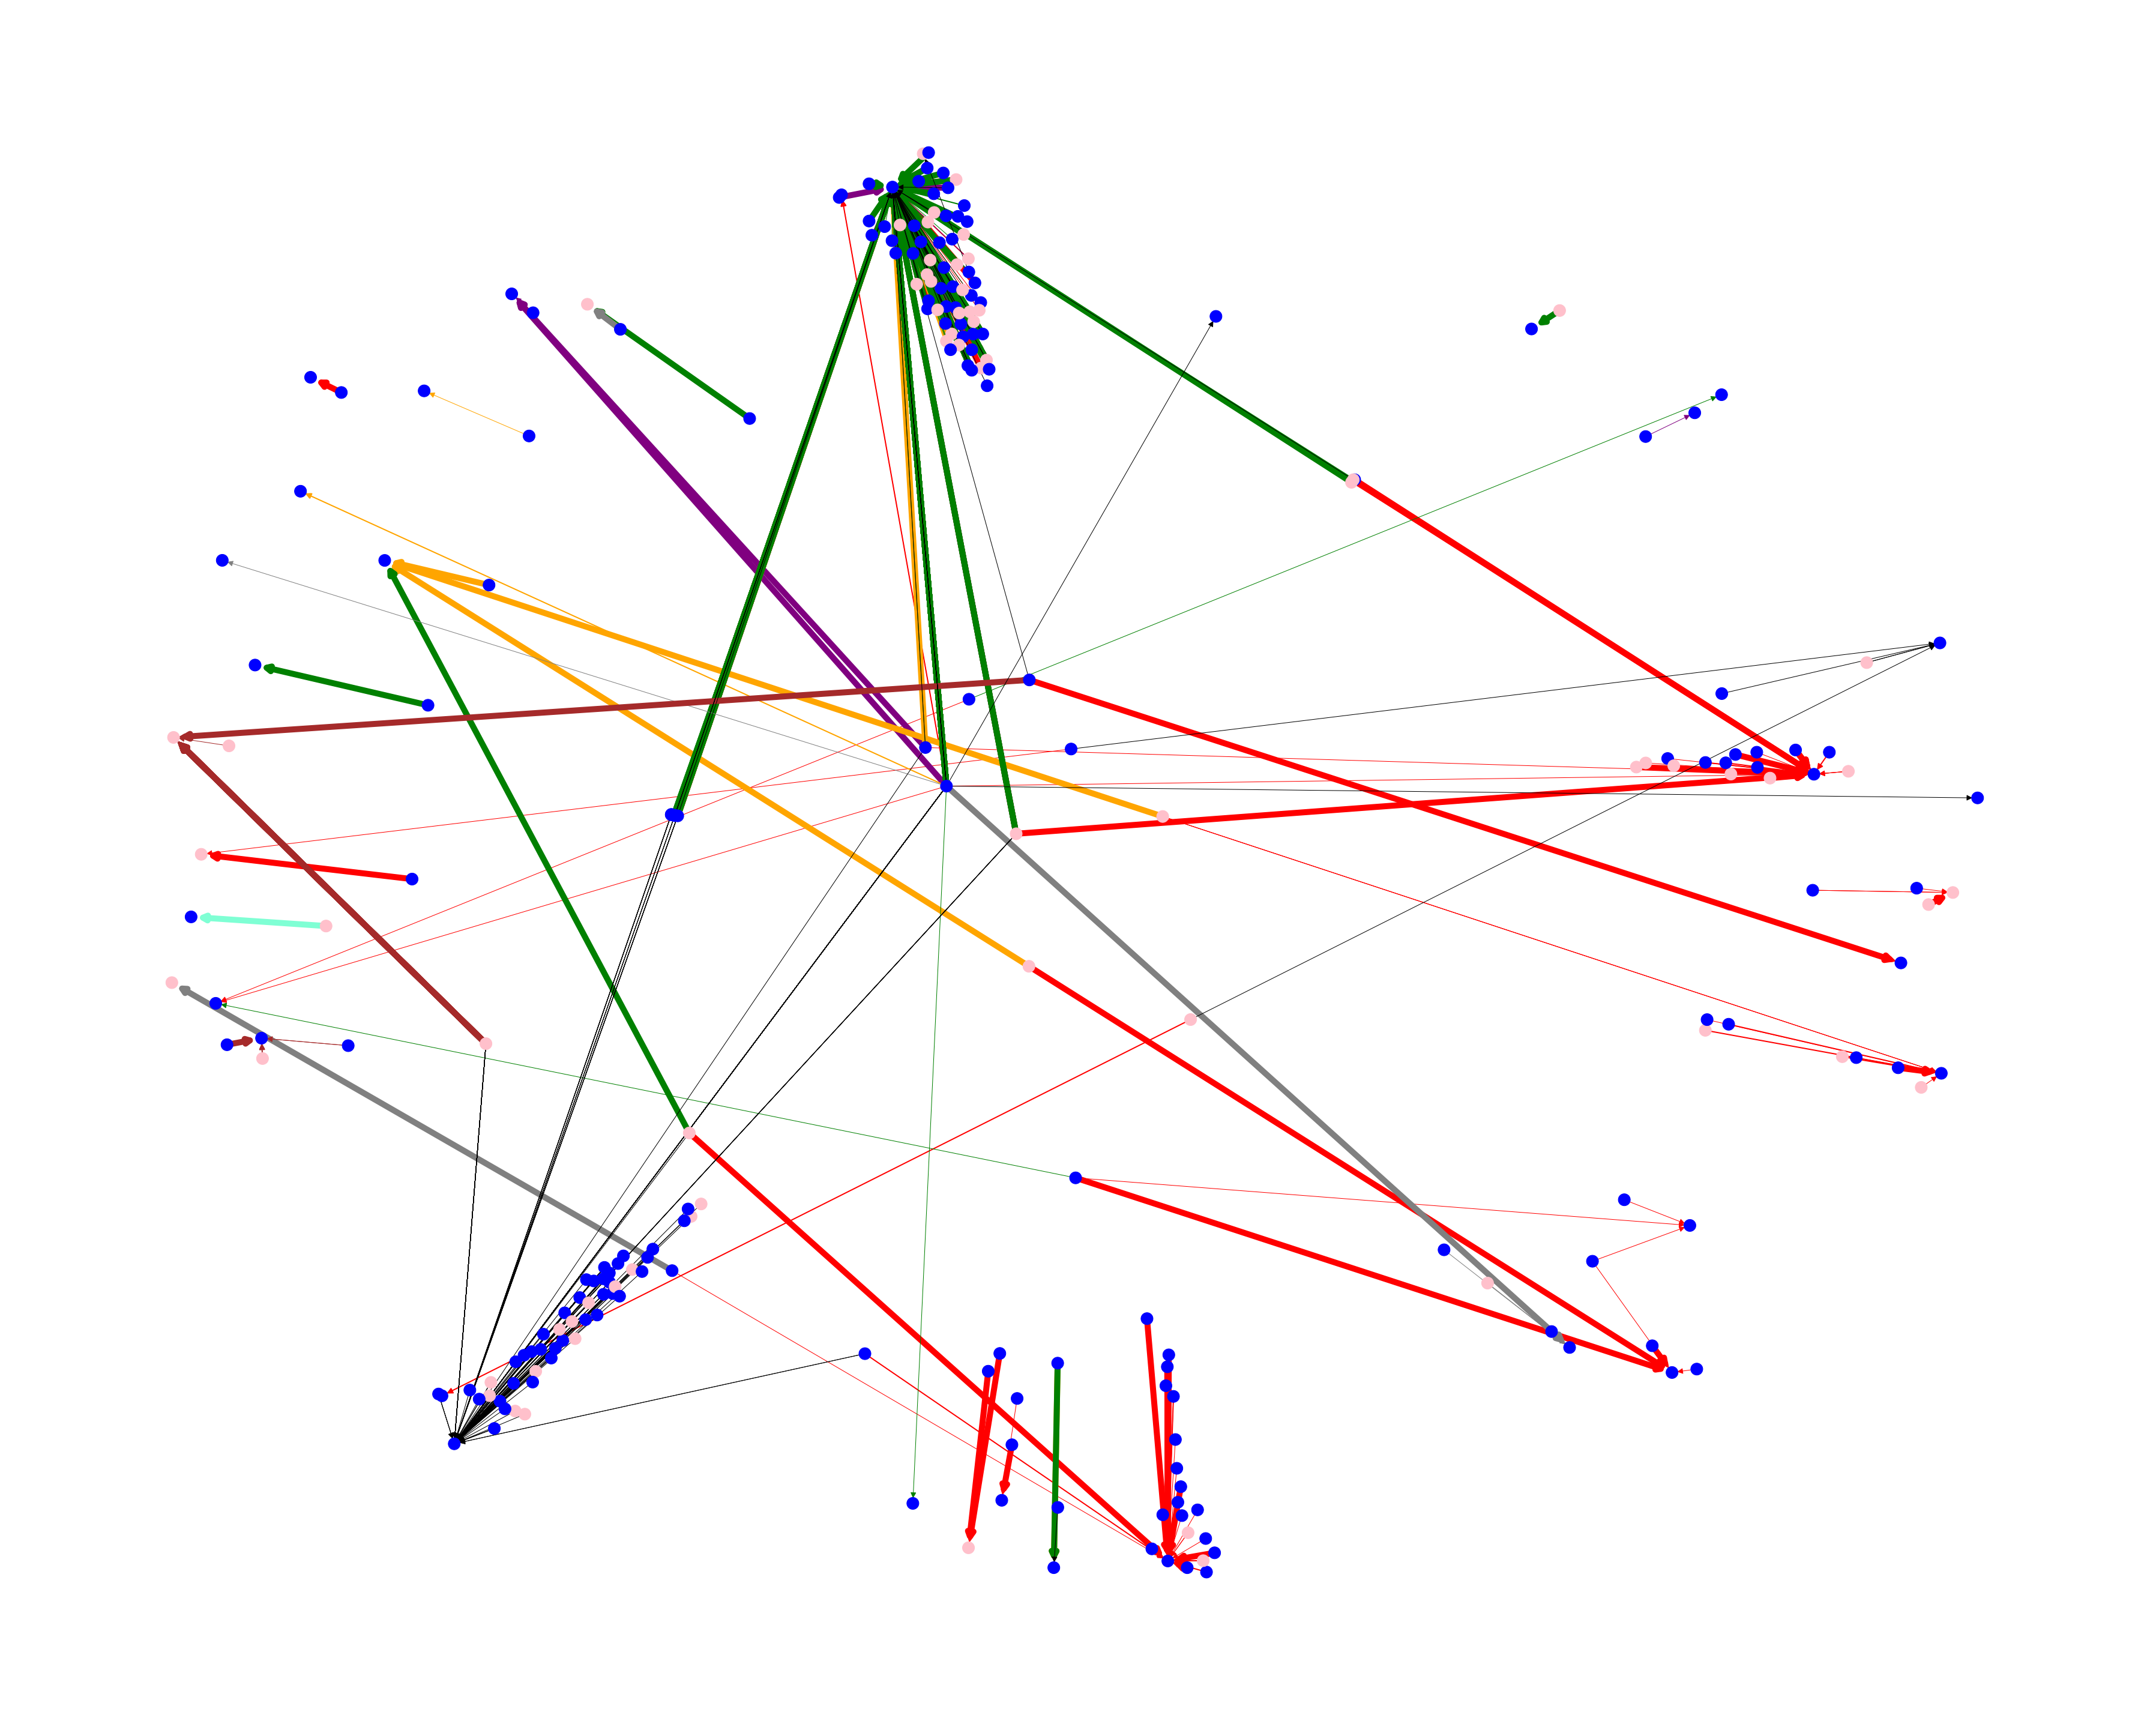

<Figure size 432x288 with 0 Axes>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

G.add_edges_from(edges_event)
G.add_edges_from(edges_org)
G.add_edges_from(edges_person)
G.add_edges_from(edges_norp)
G.add_edges_from(edges_fac)
G.add_edges_from(edges_lang)
G.add_edges_from(edges_gpe)
G.add_edges_from(edges_product)
G.add_edges_from(edges_art)


values = [val_map.get(node, 'green') for node in G.nodes()]
values1= [val_map_edges.get(node, 1) for node in G.nodes()]

# Specify the edges you want here
red_edges = edges_org
black_edges = edges_person
purple_edges= edges_norp
tangerine_edges= edges_lang
yellow_edges= edges_event
beaver_edges=edges_fac

plt.figure(figsize=(50,40))
# Need to create a layout when doing
# separate calls to draw nodes and edges
pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_color = values, node_size = 400 )
#nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edgelist=red_edges,width=values1, edge_color='red', arrows=True, arrowsize=20)
nx.draw_networkx_edges(G, pos, edgelist=purple_edges,width=values1, edge_color='purple', arrows=True, arrowsize=20)
nx.draw_networkx_edges(G, pos, edgelist=tangerine_edges,width=values1, edge_color='orange', arrows=True, arrowsize=20)
nx.draw_networkx_edges(G, pos, edgelist=beaver_edges,width=values1, edge_color='green', arrows=True, arrowsize=20)
nx.draw_networkx_edges(G, pos, edgelist=yellow_edges, width=values1,edge_color='yellow', arrows=True, arrowsize=20)
nx.draw_networkx_edges(G, pos, edgelist=edges_gpe, width=values1,edge_color='aquamarine', arrows=True, arrowsize=20)
nx.draw_networkx_edges(G, pos, edgelist=edges_product, width=values1,edge_color='gray', arrows=True, arrowsize=20)
nx.draw_networkx_edges(G, pos, edgelist=edges_art, width=values1,edge_color='brown', arrows=True, arrowsize=20)
nx.draw_networkx_edges(G, pos, edgelist=black_edges, arrows=True, arrowsize=20)
plt.tight_layout()
plt.axis("off")
plt.show()
plt.savefig('foo.png')

**Identifier of the node with the max centrality**

In [ ]:
def calcuate_the_centrality(graph):
  centrality = []
  centrality = nx.degree_centrality(graph)
  max = 0;
  index = 0;
  for i in centrality:
    if centrality[i]> max:
      max = centrality[i]
      index = i
  return index, max

print("Node with the max centrality is: ",calcuate_the_centrality(G))

Node with the max centrality is:  ('Mattflaschen-WMF', 0.3170731707317074)


**Indegree centrality**

In [ ]:
indegree_centrality = nx.in_degree_centrality(G)
print("The indegree list: ",indegree_centrality)

def calcuate_the_centrality_indegree(graph):
  max = 0;
  index = 0;
  for i in indegree_centrality:
    if indegree_centrality[i]> max:
      max = indegree_centrality[i]
      index = i
  return index, max
print("Node with the max indegree centrality is: ",calcuate_the_centrality_indegree(G))


The indegree list:  {'C.Fred': 0.0, 'Cronolio': 0.0894308943089431, 'AussieLegend': 0.0, 'Ciencia Al Poder': 0.012195121951219513, 'Doctree': 0.0, 'Mainframe98': 0.020325203252032523, 'Jimfbleak': 0.0, 'Guillom': 0.012195121951219513, 'Moonriddengirl': 0.0, 'Kethrus': 0.0, 'Mike V': 0.0, 'Dirtlawyer1': 0.0, 'Ceyockey': 0.0, 'Mglaser': 0.0040650406504065045, 'Daniel Wiki123': 0.0, 'Shirayuki': 0.032520325203252036, 'MediaWiki message delivery': 0.0, 'Baris6161TURK': 0.012195121951219513, 'Orphan Wiki': 0.0, '220 of Borg': 0.0, 'Jbhunley': 0.0, 'ClueBot NG': 0.0, 'Smalljim': 0.0, 'Andy Dingley': 0.0, 'Everymorning': 0.0, 'HostBot': 0.0, 'Tgr (WMF)': 0.0040650406504065045, 'Glen': 0.0, 'SuperHamster': 0.0, 'Sam Sailor': 0.0, 'Valhallasw': 0.008130081300813009, 'Daniel Case': 0.0, 'AndyTheGrump': 0.0, 'Yaron Koren': 0.0813008130081301, 'ThatKongregateGuy': 0.0, 'Peripitus': 0.0, 'Bbb23': 0.0, 'Bollyjeff': 0.0, 'Pigsonthewing': 0.0, 'BlueMoonset': 0.0, 'Mattflaschen-WMF': 0.3170731707317074

**Outdegree centrality**

In [ ]:
out_degree_centrality = nx.out_degree_centrality(G)
print("The outdegree list: ",out_degree_centrality)

def calcuate_the_centrality_outdegree(graph):
  max = 0;
  index = 0;
  for i in out_degree_centrality:
    if out_degree_centrality[i]> max:
      max = out_degree_centrality[i]
      index = i
  return index, max
print("Node with the max outdegree centrality is: ",calcuate_the_centrality_outdegree(G))

The outdegree list:  {'C.Fred': 0.0040650406504065045, 'Cronolio': 0.0, 'AussieLegend': 0.0040650406504065045, 'Ciencia Al Poder': 0.0, 'Doctree': 0.008130081300813009, 'Mainframe98': 0.0, 'Jimfbleak': 0.012195121951219513, 'Guillom': 0.0, 'Moonriddengirl': 0.0040650406504065045, 'Kethrus': 0.0040650406504065045, 'Mike V': 0.0040650406504065045, 'Dirtlawyer1': 0.0040650406504065045, 'Ceyockey': 0.0040650406504065045, 'Mglaser': 0.0, 'Daniel Wiki123': 0.0040650406504065045, 'Shirayuki': 0.0, 'MediaWiki message delivery': 0.04878048780487805, 'Baris6161TURK': 0.0, 'Orphan Wiki': 0.0040650406504065045, '220 of Borg': 0.0040650406504065045, 'Jbhunley': 0.008130081300813009, 'ClueBot NG': 0.008130081300813009, 'Smalljim': 0.008130081300813009, 'Andy Dingley': 0.0040650406504065045, 'Everymorning': 0.0040650406504065045, 'HostBot': 0.008130081300813009, 'Tgr (WMF)': 0.0, 'Glen': 0.0040650406504065045, 'SuperHamster': 0.0040650406504065045, 'Sam Sailor': 0.008130081300813009, 'Valhallasw': 0.

**Closeness centrality**

In [ ]:
closeness_centrality = nx.closeness_centrality(G)
print("The closeness centrality list: ", closeness_centrality )

def calcuate_the_closeness_centrality(graph):
  max = 0;
  index = 0;
  for i in closeness_centrality:
    if closeness_centrality[i]> max:
      max = closeness_centrality[i]
      index = i
  return index, max
print("Node with the max closeness centrality is: ",calcuate_the_closeness_centrality(G))

The closeness centrality list:  {'C.Fred': 0.0, 'Cronolio': 0.08943089430894309, 'AussieLegend': 0.0, 'Ciencia Al Poder': 0.012195121951219513, 'Doctree': 0.0, 'Mainframe98': 0.02032520325203252, 'Jimfbleak': 0.0, 'Guillom': 0.012195121951219513, 'Moonriddengirl': 0.0, 'Kethrus': 0.0, 'Mike V': 0.0, 'Dirtlawyer1': 0.0, 'Ceyockey': 0.0, 'Mglaser': 0.0040650406504065045, 'Daniel Wiki123': 0.0, 'Shirayuki': 0.032520325203252036, 'MediaWiki message delivery': 0.0, 'Baris6161TURK': 0.012195121951219513, 'Orphan Wiki': 0.0, '220 of Borg': 0.0, 'Jbhunley': 0.0, 'ClueBot NG': 0.0, 'Smalljim': 0.0, 'Andy Dingley': 0.0, 'Everymorning': 0.0, 'HostBot': 0.0, 'Tgr (WMF)': 0.0040650406504065045, 'Glen': 0.0, 'SuperHamster': 0.0, 'Sam Sailor': 0.0, 'Valhallasw': 0.008130081300813009, 'Daniel Case': 0.0, 'AndyTheGrump': 0.0, 'Yaron Koren': 0.08130081300813008, 'ThatKongregateGuy': 0.0, 'Peripitus': 0.0, 'Bbb23': 0.0, 'Bollyjeff': 0.0, 'Pigsonthewing': 0.0, 'BlueMoonset': 0.0, 'Mattflaschen-WMF': 0.317

**Degree**

In [ ]:
#attribute_assortativity_coefficient = nx.attribute_assortativity_coefficient(G,"color")
#print(attribute_assortativity_coefficient)
degree = G.degree()
print("The degree list: ",degree)
def calcuate_the_degree(graph):
  max = 0;
  index = 0;
  for i in degree:
    if i[1]> max:
      max = i[1]
      index = i[0]
  return index, max
print("Node with the max degree is: ",calcuate_the_degree(G))

The degree list:  [('C.Fred', 1), ('Cronolio', 22), ('AussieLegend', 1), ('Ciencia Al Poder', 3), ('Doctree', 2), ('Mainframe98', 5), ('Jimfbleak', 3), ('Guillom', 3), ('Moonriddengirl', 1), ('Kethrus', 1), ('Mike V', 1), ('Dirtlawyer1', 1), ('Ceyockey', 1), ('Mglaser', 1), ('Daniel Wiki123', 1), ('Shirayuki', 8), ('MediaWiki message delivery', 12), ('Baris6161TURK', 3), ('Orphan Wiki', 1), ('220 of Borg', 1), ('Jbhunley', 2), ('ClueBot NG', 2), ('Smalljim', 2), ('Andy Dingley', 1), ('Everymorning', 1), ('HostBot', 2), ('Tgr (WMF)', 1), ('Glen', 1), ('SuperHamster', 1), ('Sam Sailor', 2), ('Valhallasw', 2), ('Daniel Case', 1), ('AndyTheGrump', 1), ('Yaron Koren', 20), ('ThatKongregateGuy', 1), ('Peripitus', 1), ('Bbb23', 1), ('Bollyjeff', 1), ('Pigsonthewing', 2), ('BlueMoonset', 1), ('Mattflaschen-WMF', 78), ('The Herald', 1), ('Hafspajen', 2), ('Armbrust', 2), ('Scorpion0422', 1), ('BatteryIncluded', 1), ('Pine', 1), ('Logical1004', 1), ('Legobot', 1), ('DPL bot', 4), ('Rankersbo', 1

In [ ]:

centrality = nx.eigenvector_centrality(G)
print("Directed GRAPH eigenvector_centrality:", centrality)


dens=nx.density(G)
print("Directed GRAPH density:", dens)

Directed GRAPH eigenvector_centrality: {'C.Fred': 9.818369514808632e-05, 'Cronolio': 0.21178223043442285, 'AussieLegend': 9.818369514808632e-05, 'Ciencia Al Poder': 0.028964190068685423, 'Doctree': 9.818369514808632e-05, 'Mainframe98': 0.04820819431771033, 'Jimfbleak': 9.818369514808632e-05, 'Guillom': 0.028964190068685423, 'Moonriddengirl': 9.818369514808632e-05, 'Kethrus': 9.818369514808632e-05, 'Mike V': 9.818369514808632e-05, 'Dirtlawyer1': 9.818369514808632e-05, 'Ceyockey': 9.818369514808632e-05, 'Mglaser': 0.009720185819660547, 'Daniel Wiki123': 9.818369514808632e-05, 'Shirayuki': 0.07707420069124768, 'MediaWiki message delivery': 9.818369514808632e-05, 'Baris6161TURK': 0.028964190068685423, 'Orphan Wiki': 9.818369514808632e-05, '220 of Borg': 9.818369514808632e-05, 'Jbhunley': 9.818369514808632e-05, 'ClueBot NG': 9.818369514808632e-05, 'Smalljim': 9.818369514808632e-05, 'Andy Dingley': 9.818369514808632e-05, 'Everymorning': 9.818369514808632e-05, 'HostBot': 9.818369514808632e-05

**Statistics:**

In [ ]:
#Number of positive comments from a female to a male
def pos_comments_ftm():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "female" and i.page.author_gender == "male":
      all_comments +=1
      if i.status_comment == 2:
        pos_comments +=1
  return pos_comments

#Number of positive comments from a male to a male
def pos_comments_mtm():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "male" and i.page.author_gender == "male":
      all_comments +=1
      if i.status_comment == 2:
        pos_comments +=1
  return pos_comments

#Number of positive comments from a female to a female
def pos_comments_ftf():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "female" and i.page.author_gender == "female":
      all_comments +=1
      if i.status_comment == 2:
        pos_comments +=1
  return pos_comments

#Number of negative comments from a female to a male
def neg_comments_ftm():
  neg_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "female" and i.page.author_gender == "male":
      all_comments +=1
      if i.status_comment == -2:
        neg_comments +=1
  return neg_comments

#Number of negative comments from a male to a male
def neg_comments_mtm():
  neg_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "male" and i.page.author_gender == "male":
      all_comments +=1
      if i.status_comment == -2:
        neg_comments +=1
  return neg_comments 

#Number of positive comments from a male to a female
def pos_comments_mtf():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "male" and i.page.author_gender == "female":
      all_comments +=1
      if i.status_comment == 2:
        pos_comments +=1
  return pos_comments

#Number of negative comments from a female to a male
def neg_comments_mtf():
  neg_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "male" and i.page.author_gender == "female":
      all_comments +=1
      if i.status_comment == -2:
        neg_comments +=1
  return neg_comments

#Number of negative comments from a female to a female
def neg_comments_ftf():
  neg_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "female" and i.page.author_gender == "female":
      all_comments +=1
      if i.status_comment == -2:
        neg_comments +=1
  return neg_comments

PFM= pos_comments_ftm()
NFM= neg_comments_ftm()
PMF= pos_comments_mtf()
NMF= neg_comments_mtf()
PFF= pos_comments_ftf()
NFF= neg_comments_ftf()
PMM= pos_comments_mtm()
NMM= neg_comments_mtm()

In [ ]:
from tabulate import tabulate
table = [[' ', 'Positive to Female', 'Positive to Male', 'Negative to Female', 'Negative to Male', 'Sum'], ['Female',PFF, PFM , NFF, NFM, PFF+PFM+NFF+NFM], ['Male', PMF, PMM, NMF, NMM, PMF+ PMM+ NMF+NMM], ['Sum', PFF+PMF, PFM+PMM, NFF+NMF, NFM+NMM, PFF+PMF+ PFM+PMM+ NFF+NMF+ NFM+NMM]]
print(tabulate(table))

------  ------------------  ----------------  ------------------  ----------------  ---
        Positive to Female  Positive to Male  Negative to Female  Negative to Male  Sum
Female  20                  121               3                   36                180
Male    21                  287               2                   127               437
Sum     41                  408               5                   163               617
------  ------------------  ----------------  ------------------  ----------------  ---


**Negative & Positive Comments Results After Normalization**

In [ ]:
st='                              Results After Normalization             '
t1= (PFF/(PFF+PMF+ PFM+PMM+ NFF+NMF+ NFM+NMM))*100
t2= (PFM/(PFF+PMF+ PFM+PMM+ NFF+NMF+ NFM+NMM))*100
t3= (PMF/(PFF+PMF+ PFM+PMM+ NFF+NMF+ NFM+NMM))*100
t4= (PMM/(PFF+PMF+ PFM+PMM+ NFF+NMF+ NFM+NMM))*100
t5= (NFF/(PFF+PMF+ PFM+PMM+ NFF+NMF+ NFM+NMM))*100
t6= (NFM/(PFF+PMF+ PFM+PMM+ NFF+NMF+ NFM+NMM))*100
t7= (NMF/(PFF+PMF+ PFM+PMM+ NFF+NMF+ NFM+NMM))*100
t8= (NMM/(PFF+PMF+ PFM+PMM+ NFF+NMF+ NFM+NMM))*100
print(st)
table2 = [[' ', 'Positive to Female', 'Positive to Male', 'Negative to Female', 'Negative to Male', 'Percent'],['Female', str(t1)+'%', str(t2)+'%', str(t5)+'%', str(t6)+'%', str(t1+t2+t5+t6)+'%'], ['Male', str(t3)+'%', str(t4)+'%', str(t7)+'%', str(t8)+'%' , str(t3+t4+t7+t8)+'%' ]]
print(tabulate(table2))

                              Results After Normalization             
------  -------------------  -------------------  --------------------  -------------------  -------------------
        Positive to Female   Positive to Male     Negative to Female    Negative to Male     Percent
Female  3.2414910858995136%  19.611021069692057%  0.48622366288492713%  5.834683954619125%   29.173419773095624%
Male    3.403565640194489%   46.51539708265802%   0.3241491085899514%   20.583468395461914%  70.82658022690437%
------  -------------------  -------------------  --------------------  -------------------  -------------------


****Categories Of Articles  Results****

In [ ]:
print("Number of the comments on the category 'FAC'(buildings, airports, highways, bridges, etc.) article is:", len(edges_fac))
print("Number of the comments on the category 'PERSON'(person, including fictional.) article is:", len(edges_person))
print("Number of the comments on the category 'ORG'(companies, agencies, institutions, etc.) article is:", len(edges_org))
print("Number of the comments on the category 'LANGUAGE'(any named language) article is:", len(edges_lang))
print("Number of the comments on the category 'NORP'(nationalities OR religious OR political groups) article is:", len(edges_norp))
print("Number of the comments on the category 'WORK_OF_ART'(titles of books, songs, etc.) article is:", len(edges_art))
print("Number of the comments on the category 'PRODUCT'(objects, vehicles, foods, etc. (not services.)) article is:", len(edges_product))
print("Number of the comments on the category 'GBE'(countries, cities, states.) article is:", len(edges_gpe))

Number of the comments on the category 'FAC'(buildings, airports, highways, bridges, etc.) article is: 273
Number of the comments on the category 'PERSON'(person, including fictional.) article is: 270
Number of the comments on the category 'ORG'(companies, agencies, institutions, etc.) article is: 197
Number of the comments on the category 'LANGUAGE'(any named language) article is: 85
Number of the comments on the category 'NORP'(nationalities OR religious OR political groups) article is: 78
Number of the comments on the category 'WORK_OF_ART'(titles of books, songs, etc.) article is: 48
Number of the comments on the category 'PRODUCT'(objects, vehicles, foods, etc. (not services.)) article is: 7
Number of the comments on the category 'GBE'(countries, cities, states.) article is: 1


In [ ]:
#Number of positive comments from a female to a male
def pos_comments_ftm_fac():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "female" and i.page.author_gender == "male" and i.page.pageTopic=='FAC':
      all_comments +=1
      if i.status_comment == 2:
        pos_comments +=1
  return pos_comments

#Number of positive comments from a female to a male
def pos_comments_ftm_per():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "female" and i.page.author_gender == "male" and i.page.pageTopic=='PERSON':
      all_comments +=1
      if i.status_comment == 2:
        pos_comments +=1
  return pos_comments

#Number of positive comments from a female to a male
def pos_comments_ftm_org():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "female" and i.page.author_gender == "male" and i.page.pageTopic=='ORG':
      all_comments +=1
      if i.status_comment == 2:
        pos_comments +=1
  return pos_comments


#Number of positive comments from a female to a male
def pos_comments_ftm_lan():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "female" and i.page.author_gender == "male" and i.page.pageTopic=='LANGUAGE':
      all_comments +=1
      if i.status_comment == 2:
        pos_comments +=1
  return pos_comments

  #Number of positive comments from a female to a male
def pos_comments_ftm_norp():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "female" and i.page.author_gender == "male" and i.page.pageTopic=='NORP':
      all_comments +=1
      if i.status_comment == 2:
        pos_comments +=1
  return pos_comments

  #Number of positive comments from a female to a male
def pos_comments_ftm_art():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "female" and i.page.author_gender == "male" and i.page.pageTopic=='WORK_OF_ART':
      all_comments +=1
      if i.status_comment == 2:
        pos_comments +=1
  return pos_comments


  #Number of positive comments from a female to a male
def pos_comments_ftm_product():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "female" and i.page.author_gender == "male" and i.page.pageTopic=='PRODUCT':
      all_comments +=1
      if i.status_comment == 2:
        pos_comments +=1
  return pos_comments


  #Number of positive comments from a female to a male
def pos_comments_ftm_gbe():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "female" and i.page.author_gender == "male" and i.page.pageTopic=='GBE':
      all_comments +=1
      if i.status_comment == 2:
        pos_comments +=1
  return pos_comments
#___________________________________________________________________________________________________________________________________________
PFM_per= pos_comments_ftm_per()
PFM_fac= pos_comments_ftm_fac()
PFM_org= pos_comments_ftm_org()
PFM_lan= pos_comments_ftm_lan()
PFM_norp= pos_comments_ftm_norp()
PFM_art= pos_comments_ftm_art()
PFM_product= pos_comments_ftm_product()
PFM_gbe= pos_comments_ftm_gbe()
print("Number of the positive comments (female to male ) on the category 'FAC'(buildings, airports, highways, bridges, etc.) article is:", PFM_fac)
print("Number of the positive comments (female to male ) on the category 'PERSON'(person, including fictional.) article is:", PFM_per)
print("Number of the positive comments (female to male ) on the category 'ORG'(companies, agencies, institutions, etc.) article is:", PFM_org)
print("Number of the positive comments (female to male ) on the category 'LANGUAGE'(any named language) article is:", PFM_lan)
print("Number of the positive comments (female to male ) on the category 'NORP'(nationalities OR religious OR political groups) article is:", PFM_norp)
print("Number of the positive comments (female to male ) on the category 'WORK_OF_ART'(titles of books, songs, etc.) article is:", PFM_art)
print("Number of the positive comments (female to male ) on the category 'PRODUCT'(objects, vehicles, foods, etc. (not services.)) article is:", PFM_product)
print("Number of the positive comments (female to male ) on the category 'GBE'(countries, cities, states.) article is:", PFM_gbe)

Number of the positive comments (female to male ) on the category 'FAC'(buildings, airports, highways, bridges, etc.) article is: 22
Number of the positive comments (female to male ) on the category 'PERSON'(person, including fictional.) article is: 55
Number of the positive comments (female to male ) on the category 'ORG'(companies, agencies, institutions, etc.) article is: 22
Number of the positive comments (female to male ) on the category 'LANGUAGE'(any named language) article is: 9
Number of the positive comments (female to male ) on the category 'NORP'(nationalities OR religious OR political groups) article is: 7
Number of the positive comments (female to male ) on the category 'WORK_OF_ART'(titles of books, songs, etc.) article is: 2
Number of the positive comments (female to male ) on the category 'PRODUCT'(objects, vehicles, foods, etc. (not services.)) article is: 1
Number of the positive comments (female to male ) on the category 'GBE'(countries, cities, states.) article is:

In [ ]:
#Number of positive comments from a female to a male
def pos_comments_mtm_fac():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "male" and i.page.author_gender == "male" and i.page.pageTopic=='FAC':
      all_comments +=1
      if i.status_comment == 2:
        pos_comments +=1
  return pos_comments

#Number of positive comments from a female to a male
def pos_comments_mtm_per():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "male" and i.page.author_gender == "male" and i.page.pageTopic=='PERSON':
      all_comments +=1
      if i.status_comment == 2:
        pos_comments +=1
  return pos_comments

#Number of positive comments from a female to a male
def pos_comments_mtm_org():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "male" and i.page.author_gender == "male" and i.page.pageTopic=='ORG':
      all_comments +=1
      if i.status_comment == 2:
        pos_comments +=1
  return pos_comments


#Number of positive comments from a female to a male
def pos_comments_mtm_lan():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "male" and i.page.author_gender == "male" and i.page.pageTopic=='LANGUAGE':
      all_comments +=1
      if i.status_comment == 2:
        pos_comments +=1
  return pos_comments

  #Number of positive comments from a female to a male
def pos_comments_mtm_norp():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "male" and i.page.author_gender == "male" and i.page.pageTopic=='NORP':
      all_comments +=1
      if i.status_comment == 2:
        pos_comments +=1
  return pos_comments

  #Number of positive comments from a female to a male
def pos_comments_mtm_art():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "male" and i.page.author_gender == "male" and i.page.pageTopic=='WORK_OF_ART':
      all_comments +=1
      if i.status_comment == 2:
        pos_comments +=1
  return pos_comments


  #Number of positive comments from a female to a male
def pos_comments_mtm_product():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "male" and i.page.author_gender == "male" and i.page.pageTopic=='PRODUCT':
      all_comments +=1
      if i.status_comment == 2:
        pos_comments +=1
  return pos_comments


  #Number of positive comments from a female to a male
def pos_comments_mtm_gbe():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "male" and i.page.author_gender == "male" and i.page.pageTopic=='GBE':
      all_comments +=1
      if i.status_comment == 2:
        pos_comments +=1
  return pos_comments
#___________________________________________________________________________________________________________________________________________
PMM_per= pos_comments_mtm_per()
PMM_fac= pos_comments_mtm_fac()
PMM_org= pos_comments_mtm_org()
PMM_lan= pos_comments_mtm_lan()
PMM_norp= pos_comments_mtm_norp()
PMM_art= pos_comments_mtm_art()
PMM_product= pos_comments_mtm_product()
PMM_gbe= pos_comments_mtm_gbe()
print("Number of the positive comments (male to male ) on the category 'FAC'(buildings, airports, highways, bridges, etc.) article is:", PMM_fac)
print("Number of the positive comments (male to male ) on the category 'PERSON'(person, including fictional.) article is:", PMM_per)
print("Number of the positive comments (male to male ) on the category 'ORG'(companies, agencies, institutions, etc.) article is:", PMM_org)
print("Number of the positive comments (male to male ) on the category 'LANGUAGE'(any named language) article is:", PMM_lan)
print("Number of the positive comments (male to male ) on the category 'NORP'(nationalities OR religious OR political groups) article is:", PMM_norp)
print("Number of the positive comments (male to male ) on the category 'WORK_OF_ART'(titles of books, songs, etc.) article is:", PMM_art)
print("Number of the positive comments (male to male ) on the category 'PRODUCT'(objects, vehicles, foods, etc. (not services.)) article is:", PMM_product)
print("Number of the positive comments (male to male ) on the category 'GBE'(countries, cities, states.) article is:", PMM_gbe)

Number of the positive comments (male to male ) on the category 'FAC'(buildings, airports, highways, bridges, etc.) article is: 97
Number of the positive comments (male to male ) on the category 'PERSON'(person, including fictional.) article is: 61
Number of the positive comments (male to male ) on the category 'ORG'(companies, agencies, institutions, etc.) article is: 65
Number of the positive comments (male to male ) on the category 'LANGUAGE'(any named language) article is: 28
Number of the positive comments (male to male ) on the category 'NORP'(nationalities OR religious OR political groups) article is: 25
Number of the positive comments (male to male ) on the category 'WORK_OF_ART'(titles of books, songs, etc.) article is: 0
Number of the positive comments (male to male ) on the category 'PRODUCT'(objects, vehicles, foods, etc. (not services.)) article is: 2
Number of the positive comments (male to male ) on the category 'GBE'(countries, cities, states.) article is: 0


In [ ]:
#Number of positive comments from a female to a male
def pos_comments_ftf_fac():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "female" and i.page.author_gender == "female" and i.page.pageTopic=='FAC':
      all_comments +=1
      if i.status_comment == 2:
        pos_comments +=1
  return pos_comments

#Number of positive comments from a female to a male
def pos_comments_ftf_per():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "female" and i.page.author_gender == "female" and i.page.pageTopic=='PERSON':
      all_comments +=1
      if i.status_comment == 2:
        pos_comments +=1
  return pos_comments

#Number of positive comments from a female to a male
def pos_comments_ftf_org():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "female" and i.page.author_gender == "female" and i.page.pageTopic=='ORG':
      all_comments +=1
      if i.status_comment == 2:
        pos_comments +=1
  return pos_comments


#Number of positive comments from a female to a male
def pos_comments_ftf_lan():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "female" and i.page.author_gender == "female" and i.page.pageTopic=='LANGUAGE':
      all_comments +=1
      if i.status_comment == 2:
        pos_comments +=1
  return pos_comments

  #Number of positive comments from a female to a male
def pos_comments_ftf_norp():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "female" and i.page.author_gender == "female" and i.page.pageTopic=='NORP':
      all_comments +=1
      if i.status_comment == 2:
        pos_comments +=1
  return pos_comments

  #Number of positive comments from a female to a male
def pos_comments_ftf_art():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "female" and i.page.author_gender == "female" and i.page.pageTopic=='WORK_OF_ART':
      all_comments +=1
      if i.status_comment == 2:
        pos_comments +=1
  return pos_comments


  #Number of positive comments from a female to a male
def pos_comments_ftf_product():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "female" and i.page.author_gender == "female" and i.page.pageTopic=='PRODUCT':
      all_comments +=1
      if i.status_comment == 2:
        pos_comments +=1
  return pos_comments


  #Number of positive comments from a female to a male
def pos_comments_ftf_gbe():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "female" and i.page.author_gender == "female" and i.page.pageTopic=='GBE':
      all_comments +=1
      if i.status_comment == 2:
        pos_comments +=1
  return pos_comments
#___________________________________________________________________________________________________________________________________________
PFF_per= pos_comments_ftf_per()
PFF_fac= pos_comments_ftf_fac()
PFF_org= pos_comments_ftf_org()
PFF_lan= pos_comments_ftf_lan()
PFF_norp= pos_comments_ftf_norp()
PFF_art= pos_comments_ftf_art()
PFF_product= pos_comments_ftf_product()
PFF_gbe= pos_comments_ftf_gbe()
print("Number of the positive comments (female to female ) on the category 'FAC'(buildings, airports, highways, bridges, etc.) article is:", PFF_fac)
print("Number of the positive comments (female to female ) on the category 'PERSON'(person, including fictional.) article is:", PFF_per)
print("Number of the positive comments (female to female ) on the category 'ORG'(companies, agencies, institutions, etc.) article is:", PFF_org)
print("Number of the positive comments (female to female ) on the category 'LANGUAGE'(any named language) article is:", PFF_lan)
print("Number of the positive comments (female to female ) on the category 'NORP'(nationalities OR religious OR political groups) article is:", PFF_norp)
print("Number of the positive comments (female to female ) on the category 'WORK_OF_ART'(titles of books, songs, etc.) article is:", PFF_art)
print("Number of the positive comments (female to female ) on the category 'PRODUCT'(objects, vehicles, foods, etc. (not services.)) article is:", PFF_product)
print("Number of the positive comments (female to female ) on the category 'GBE'(countries, cities, states.) article is:", PFF_gbe)

Number of the positive comments (female to female ) on the category 'FAC'(buildings, airports, highways, bridges, etc.) article is: 0
Number of the positive comments (female to female ) on the category 'PERSON'(person, including fictional.) article is: 0
Number of the positive comments (female to female ) on the category 'ORG'(companies, agencies, institutions, etc.) article is: 1
Number of the positive comments (female to female ) on the category 'LANGUAGE'(any named language) article is: 0
Number of the positive comments (female to female ) on the category 'NORP'(nationalities OR religious OR political groups) article is: 0
Number of the positive comments (female to female ) on the category 'WORK_OF_ART'(titles of books, songs, etc.) article is: 19
Number of the positive comments (female to female ) on the category 'PRODUCT'(objects, vehicles, foods, etc. (not services.)) article is: 0
Number of the positive comments (female to female ) on the category 'GBE'(countries, cities, states

In [ ]:

def neg_comments_ftm_fac():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "female" and i.page.author_gender == "male" and i.page.pageTopic=='FAC':
      all_comments +=1
      if i.status_comment == -2:
        pos_comments +=1
  return pos_comments


def neg_comments_ftm_per():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "female" and i.page.author_gender == "male" and i.page.pageTopic=='PERSON':
      all_comments +=1
      if i.status_comment == -2:
        pos_comments +=1
  return pos_comments


def neg_comments_ftm_org():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "female" and i.page.author_gender == "male" and i.page.pageTopic=='ORG':
      all_comments +=1
      if i.status_comment == -2:
        pos_comments +=1
  return pos_comments



def neg_comments_ftm_lan():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "female" and i.page.author_gender == "male" and i.page.pageTopic=='LANGUAGE':
      all_comments +=1
      if i.status_comment == -2:
        pos_comments +=1
  return pos_comments


def neg_comments_ftm_norp():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "female" and i.page.author_gender == "male" and i.page.pageTopic=='NORP':
      all_comments +=1
      if i.status_comment == -2:
        pos_comments +=1
  return pos_comments

  #Number of positive comments from a female to a male
def neg_comments_ftm_art():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "female" and i.page.author_gender == "male" and i.page.pageTopic=='WORK_OF_ART':
      all_comments +=1
      if i.status_comment == -2:
        pos_comments +=1
  return pos_comments


  #Number of positive comments from a female to a male
def neg_comments_ftm_product():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "female" and i.page.author_gender == "male" and i.page.pageTopic=='PRODUCT':
      all_comments +=1
      if i.status_comment == -2:
        pos_comments +=1
  return pos_comments


  #Number of positive comments from a female to a male
def neg_comments_ftm_gbe():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "female" and i.page.author_gender == "male" and i.page.pageTopic=='GBE':
      all_comments +=1
      if i.status_comment == -2:
        pos_comments +=1
  return pos_comments
#___________________________________________________________________________________________________________________________________________
NFM_per= neg_comments_ftm_per()
NFM_fac= neg_comments_ftm_fac()
NFM_org= neg_comments_ftm_org()
NFM_lan= neg_comments_ftm_lan()
NFM_norp= neg_comments_ftm_norp()
NFM_art= neg_comments_ftm_art()
NFM_product= neg_comments_ftm_product()
NFM_gbe= neg_comments_ftm_gbe()
print("Number of the negative  comments (female to male ) on the category 'FAC'(buildings, airports, highways, bridges, etc.) article is:", NFM_fac)
print("Number of the negative comments (female to male ) on the category 'PERSON'(person, including fictional.) article is:", NFM_per)
print("Number of the negative comments (female to male ) on the category 'ORG'(companies, agencies, institutions, etc.) article is:", NFM_org)
print("Number of the negative comments (female to male ) on the category 'LANGUAGE'(any named language) article is:", NFM_lan)
print("Number of the negative comments (female to male ) on the category 'NORP'(nationalities OR religious OR political groups) article is:", NFM_norp)
print("Number of the negative comments (female to male ) on the category 'WORK_OF_ART'(titles of books, songs, etc.) article is:", NFM_art)
print("Number of the negative comments (female to male ) on the category 'PRODUCT'(objects, vehicles, foods, etc. (not services.)) article is:", NFM_product)
print("Number of the negative comments (female to male ) on the category 'GBE'(countries, cities, states.) article is:", NFM_gbe)

Number of the negative  comments (female to male ) on the category 'FAC'(buildings, airports, highways, bridges, etc.) article is: 10
Number of the negative comments (female to male ) on the category 'PERSON'(person, including fictional.) article is: 18
Number of the negative comments (female to male ) on the category 'ORG'(companies, agencies, institutions, etc.) article is: 6
Number of the negative comments (female to male ) on the category 'LANGUAGE'(any named language) article is: 1
Number of the negative comments (female to male ) on the category 'NORP'(nationalities OR religious OR political groups) article is: 1
Number of the negative comments (female to male ) on the category 'WORK_OF_ART'(titles of books, songs, etc.) article is: 0
Number of the negative comments (female to male ) on the category 'PRODUCT'(objects, vehicles, foods, etc. (not services.)) article is: 0
Number of the negative comments (female to male ) on the category 'GBE'(countries, cities, states.) article is:

In [ ]:

def neg_comments_mtm_fac():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "male" and i.page.author_gender == "male" and i.page.pageTopic=='FAC':
      all_comments +=1
      if i.status_comment == -2:
        pos_comments +=1
  return pos_comments


def neg_comments_mtm_per():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "male" and i.page.author_gender == "male" and i.page.pageTopic=='PERSON':
      all_comments +=1
      if i.status_comment == -2:
        pos_comments +=1
  return pos_comments


def neg_comments_mtm_org():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "male" and i.page.author_gender == "male" and i.page.pageTopic=='ORG':
      all_comments +=1
      if i.status_comment == -2:
        pos_comments +=1
  return pos_comments



def neg_comments_mtm_lan():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "male" and i.page.author_gender == "male" and i.page.pageTopic=='LANGUAGE':
      all_comments +=1
      if i.status_comment == -2:
        pos_comments +=1
  return pos_comments


def neg_comments_mtm_norp():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "male" and i.page.author_gender == "male" and i.page.pageTopic=='NORP':
      all_comments +=1
      if i.status_comment == -2:
        pos_comments +=1
  return pos_comments

  #Number of positive comments from a female to a male
def neg_comments_mtm_art():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "male" and i.page.author_gender == "male" and i.page.pageTopic=='WORK_OF_ART':
      all_comments +=1
      if i.status_comment == -2:
        pos_comments +=1
  return pos_comments


  #Number of positive comments from a female to a male
def neg_comments_mtm_product():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "male" and i.page.author_gender == "male" and i.page.pageTopic=='PRODUCT':
      all_comments +=1
      if i.status_comment == -2:
        pos_comments +=1
  return pos_comments


  #Number of positive comments from a female to a male
def neg_comments_mtm_gbe():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "male" and i.page.author_gender == "male" and i.page.pageTopic=='GBE':
      all_comments +=1
      if i.status_comment == -2:
        pos_comments +=1
  return pos_comments
#___________________________________________________________________________________________________________________________________________
NMM_per= neg_comments_mtm_per()
NMM_fac= neg_comments_mtm_fac()
NMM_org= neg_comments_mtm_org()
NMM_lan= neg_comments_mtm_lan()
NMM_norp= neg_comments_mtm_norp()
NMM_art= neg_comments_mtm_art()
NMM_product= neg_comments_mtm_product()
NMM_gbe= neg_comments_mtm_gbe()
print("Number of the negative  comments (male to male ) on the category 'FAC'(buildings, airports, highways, bridges, etc.) article is:", NMM_fac)
print("Number of the negative comments (male to male ) on the category 'PERSON'(person, including fictional.) article is:", NMM_per)
print("Number of the negative comments (male to male ) on the category 'ORG'(companies, agencies, institutions, etc.) article is:", NMM_org)
print("Number of the negative comments (male to male ) on the category 'LANGUAGE'(any named language) article is:", NMM_lan)
print("Number of the negative comments (male to male ) on the category 'NORP'(nationalities OR religious OR political groups) article is:", NMM_norp)
print("Number of the negative comments (male to male ) on the category 'WORK_OF_ART'(titles of books, songs, etc.) article is:", NMM_art)
print("Number of the negative comments (male to male ) on the category 'PRODUCT'(objects, vehicles, foods, etc. (not services.)) article is:", NMM_product)
print("Number of the negative comments (male to male ) on the category 'GBE'(countries, cities, states.) article is:", NMM_gbe)

Number of the negative  comments (male to male ) on the category 'FAC'(buildings, airports, highways, bridges, etc.) article is: 32
Number of the negative comments (male to male ) on the category 'PERSON'(person, including fictional.) article is: 41
Number of the negative comments (male to male ) on the category 'ORG'(companies, agencies, institutions, etc.) article is: 29
Number of the negative comments (male to male ) on the category 'LANGUAGE'(any named language) article is: 10
Number of the negative comments (male to male ) on the category 'NORP'(nationalities OR religious OR political groups) article is: 10
Number of the negative comments (male to male ) on the category 'WORK_OF_ART'(titles of books, songs, etc.) article is: 1
Number of the negative comments (male to male ) on the category 'PRODUCT'(objects, vehicles, foods, etc. (not services.)) article is: 1
Number of the negative comments (male to male ) on the category 'GBE'(countries, cities, states.) article is: 0


In [ ]:
#Number of positive comments from a female to a male
def pos_comments_mtf_fac():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "male" and i.page.author_gender == "female" and i.page.pageTopic=='FAC':
      all_comments +=1
      if i.status_comment == 2:
        pos_comments +=1
  return pos_comments

#Number of positive comments from a female to a male
def pos_comments_mtf_per():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "male" and i.page.author_gender == "female" and i.page.pageTopic=='PERSON':
      all_comments +=1
      if i.status_comment == 2:
        pos_comments +=1
  return pos_comments

#Number of positive comments from a female to a male
def pos_comments_mtf_org():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "male" and i.page.author_gender == "female" and i.page.pageTopic=='ORG':
      all_comments +=1
      if i.status_comment == 2:
        pos_comments +=1
  return pos_comments


#Number of positive comments from a female to a male
def pos_comments_mtf_lan():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "male" and i.page.author_gender == "female" and i.page.pageTopic=='LANGUAGE':
      all_comments +=1
      if i.status_comment == 2:
        pos_comments +=1
  return pos_comments

  #Number of positive comments from a female to a male
def pos_comments_mtf_norp():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "male" and i.page.author_gender == "female" and i.page.pageTopic=='NORP':
      all_comments +=1
      if i.status_comment == 2:
        pos_comments +=1
  return pos_comments

  #Number of positive comments from a female to a male
def pos_comments_mtf_art():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "male" and i.page.author_gender == "female" and i.page.pageTopic=='WORK_OF_ART':
      all_comments +=1
      if i.status_comment == 2:
        pos_comments +=1
  return pos_comments


  #Number of positive comments from a female to a male
def pos_comments_mtf_product():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "male" and i.page.author_gender == "female" and i.page.pageTopic=='PRODUCT':
      all_comments +=1
      if i.status_comment == 2:
        pos_comments +=1
  return pos_comments


  #Number of positive comments from a female to a male
def pos_comments_mtf_gbe():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "male" and i.page.author_gender == "female" and i.page.pageTopic=='GBE':
      all_comments +=1
      if i.status_comment == 2:
        pos_comments +=1
  return pos_comments
#___________________________________________________________________________________________________________________________________________
PMF_per= pos_comments_mtf_per()
PMF_fac= pos_comments_mtf_fac()
PMF_org= pos_comments_mtf_org()
PMF_lan= pos_comments_mtf_lan()
PMF_norp= pos_comments_mtf_norp()
PMF_art= pos_comments_mtf_art()
PMF_product= pos_comments_mtf_product()
PMF_gbe= pos_comments_mtf_gbe()
print("Number of the positive comments (male to female  ) on the category 'FAC'(buildings, airports, highways, bridges, etc.) article is:", PMF_fac)
print("Number of the positive comments (male to female  ) on the category 'PERSON'(person, including fictional.) article is:", PMF_per)
print("Number of the positive comments (male to female  ) on the category 'ORG'(companies, agencies, institutions, etc.) article is:", PMF_org)
print("Number of the positive comments (male to female  ) on the category 'LANGUAGE'(any named language) article is:", PMF_lan)
print("Number of the positive comments (male to female  ) on the category 'NORP'(nationalities OR religious OR political groups) article is:", PMF_norp)
print("Number of the positive comments (male to female  ) on the category 'WORK_OF_ART'(titles of books, songs, etc.) article is:", PMF_art)
print("Number of the positive comments (male to female  ) on the category 'PRODUCT'(objects, vehicles, foods, etc. (not services.)) article is:", PMF_product)
print("Number of the positive comments (male to female  ) on the category 'GBE'(countries, cities, states.) article is:", PMF_gbe)

Number of the positive comments (male to female  ) on the category 'FAC'(buildings, airports, highways, bridges, etc.) article is: 0
Number of the positive comments (male to female  ) on the category 'PERSON'(person, including fictional.) article is: 1
Number of the positive comments (male to female  ) on the category 'ORG'(companies, agencies, institutions, etc.) article is: 7
Number of the positive comments (male to female  ) on the category 'LANGUAGE'(any named language) article is: 0
Number of the positive comments (male to female  ) on the category 'NORP'(nationalities OR religious OR political groups) article is: 0
Number of the positive comments (male to female  ) on the category 'WORK_OF_ART'(titles of books, songs, etc.) article is: 0
Number of the positive comments (male to female  ) on the category 'PRODUCT'(objects, vehicles, foods, etc. (not services.)) article is: 2
Number of the positive comments (male to female  ) on the category 'GBE'(countries, cities, states.) articl

In [ ]:
def neg_comments_mtf_fac():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "male" and i.page.author_gender == "female" and i.page.pageTopic=='FAC':
      all_comments +=1
      if i.status_comment == -2:
        pos_comments +=1
  return pos_comments


def neg_comments_mtf_per():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "male" and i.page.author_gender == "female" and i.page.pageTopic=='PERSON':
      all_comments +=1
      if i.status_comment == -2:
        pos_comments +=1
  return pos_comments


def neg_comments_mtf_org():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "male" and i.page.author_gender == "female" and i.page.pageTopic=='ORG':
      all_comments +=1
      if i.status_comment == -2:
        pos_comments +=1
  return pos_comments



def neg_comments_mtf_lan():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "male" and i.page.author_gender == "female" and i.page.pageTopic=='LANGUAGE':
      all_comments +=1
      if i.status_comment == -2:
        pos_comments +=1
  return pos_comments


def neg_comments_mtf_norp():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "male" and i.page.author_gender == "female" and i.page.pageTopic=='NORP':
      all_comments +=1
      if i.status_comment == -2:
        pos_comments +=1
  return pos_comments

  #Number of positive comments from a female to a male
def neg_comments_mtf_art():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "male" and i.page.author_gender == "female" and i.page.pageTopic=='WORK_OF_ART':
      all_comments +=1
      if i.status_comment == -2:
        pos_comments +=1
  return pos_comments


  #Number of positive comments from a female to a male
def neg_comments_mtf_product():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "male" and i.page.author_gender == "female" and i.page.pageTopic=='PRODUCT':
      all_comments +=1
      if i.status_comment == -2:
        pos_comments +=1
  return pos_comments


  #Number of positive comments from a female to a male
def neg_comments_mtf_gbe():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "male" and i.page.author_gender == "female" and i.page.pageTopic=='GBE':
      all_comments +=1
      if i.status_comment == -2:
        pos_comments +=1
  return pos_comments
#___________________________________________________________________________________________________________________________________________
NMF_per= neg_comments_mtf_per()
NMF_fac= neg_comments_mtf_fac()
NMF_org= neg_comments_mtf_org()
NMF_lan= neg_comments_mtf_lan()
NMF_norp= neg_comments_mtf_norp()
NMF_art= neg_comments_mtf_art()
NMF_product= neg_comments_mtf_product()
NMF_gbe= neg_comments_mtf_gbe()
print("Number of the negative  comments (male to female ) on the category 'FAC'(buildings, airports, highways, bridges, etc.) article is:", NMF_fac)
print("Number of the negative comments (male to female ) on the category 'PERSON'(person, including fictional.) article is:", NMF_per)
print("Number of the negative comments (male to female ) on the category 'ORG'(companies, agencies, institutions, etc.) article is:", NMF_org)
print("Number of the negative comments (male to female) on the category 'LANGUAGE'(any named language) article is:", NMF_lan)
print("Number of the negative comments (male to female ) on the category 'NORP'(nationalities OR religious OR political groups) article is:", NMF_norp)
print("Number of the negative comments (male to female ) on the category 'WORK_OF_ART'(titles of books, songs, etc.) article is:", NMF_art)
print("Number of the negative comments (male to female ) on the category 'PRODUCT'(objects, vehicles, foods, etc. (not services.)) article is:", NMF_product)
print("Number of the negative comments (male to female ) on the category 'GBE'(countries, cities, states.) article is:", NMF_gbe)

Number of the negative  comments (male to female ) on the category 'FAC'(buildings, airports, highways, bridges, etc.) article is: 0
Number of the negative comments (male to female ) on the category 'PERSON'(person, including fictional.) article is: 0
Number of the negative comments (male to female ) on the category 'ORG'(companies, agencies, institutions, etc.) article is: 0
Number of the negative comments (male to female) on the category 'LANGUAGE'(any named language) article is: 0
Number of the negative comments (male to female ) on the category 'NORP'(nationalities OR religious OR political groups) article is: 0
Number of the negative comments (male to female ) on the category 'WORK_OF_ART'(titles of books, songs, etc.) article is: 0
Number of the negative comments (male to female ) on the category 'PRODUCT'(objects, vehicles, foods, etc. (not services.)) article is: 0
Number of the negative comments (male to female ) on the category 'GBE'(countries, cities, states.) article is: 0


In [ ]:
def neg_comments_ftf_fac():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "female" and i.page.author_gender == "female" and i.page.pageTopic=='FAC':
      all_comments +=1
      if i.status_comment == -2:
        pos_comments +=1
  return pos_comments


def neg_comments_ftf_per():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "female" and i.page.author_gender == "female" and i.page.pageTopic=='PERSON':
      all_comments +=1
      if i.status_comment == -2:
        pos_comments +=1
  return pos_comments


def neg_comments_ftf_org():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "female" and i.page.author_gender == "female" and i.page.pageTopic=='ORG':
      all_comments +=1
      if i.status_comment == -2:
        pos_comments +=1
  return pos_comments



def neg_comments_ftf_lan():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "female" and i.page.author_gender == "female" and i.page.pageTopic=='LANGUAGE':
      all_comments +=1
      if i.status_comment == -2:
        pos_comments +=1
  return pos_comments


def neg_comments_ftf_norp():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "female" and i.page.author_gender == "female" and i.page.pageTopic=='NORP':
      all_comments +=1
      if i.status_comment == -2:
        pos_comments +=1
  return pos_comments

  #Number of positive comments from a female to a male
def neg_comments_ftf_art():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "female" and i.page.author_gender == "female" and i.page.pageTopic=='WORK_OF_ART':
      all_comments +=1
      if i.status_comment == -2:
        pos_comments +=1
  return pos_comments


  #Number of positive comments from a female to a male
def neg_comments_ftf_product():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "female" and i.page.author_gender == "female" and i.page.pageTopic=='PRODUCT':
      all_comments +=1
      if i.status_comment == -2:
        pos_comments +=1
  return pos_comments


  #Number of positive comments from a female to a male
def neg_comments_ftf_gbe():
  pos_comments = 0
  all_comments = 0
  for i in list_of_wikiTalk:
    if i.user.gender == "female" and i.page.author_gender == "female" and i.page.pageTopic=='GBE':
      all_comments +=1
      if i.status_comment == -2:
        pos_comments +=1
  return pos_comments
#___________________________________________________________________________________________________________________________________________
NFF_per= neg_comments_ftf_per()
NFF_fac= neg_comments_ftf_fac()
NFF_org= neg_comments_ftf_org()
NFF_lan= neg_comments_ftf_lan()
NFF_norp= neg_comments_ftf_norp()
NFF_art= neg_comments_ftf_art()
NFF_product= neg_comments_ftf_product()
NFF_gbe= neg_comments_ftf_gbe()
print("Number of the negative  comments (female to female ) on the category 'FAC'(buildings, airports, highways, bridges, etc.) article is:", NFF_fac)
print("Number of the negative comments (female to female ) on the category 'PERSON'(person, including fictional.) article is:", NFF_per)
print("Number of the negative comments (female to female ) on the category 'ORG'(companies, agencies, institutions, etc.) article is:", NFF_org)
print("Number of the negative comments (female to female ) on the category 'LANGUAGE'(any named language) article is:", NFF_lan)
print("Number of the negative comments (female to female ) on the category 'NORP'(nationalities OR religious OR political groups) article is:", NFF_norp)
print("Number of the negative comments (female to female ) on the category 'WORK_OF_ART'(titles of books, songs, etc.) article is:", NFF_art)
print("Number of the negative comments (female to female ) on the category 'PRODUCT'(objects, vehicles, foods, etc. (not services.)) article is:", NFF_product)
print("Number of the negative comments (female to female ) on the category 'GBE'(countries, cities, states.) article is:", NFF_gbe)




Number of the negative  comments (female to female ) on the category 'FAC'(buildings, airports, highways, bridges, etc.) article is: 0
Number of the negative comments (female to female ) on the category 'PERSON'(person, including fictional.) article is: 0
Number of the negative comments (female to female ) on the category 'ORG'(companies, agencies, institutions, etc.) article is: 0
Number of the negative comments (female to female ) on the category 'LANGUAGE'(any named language) article is: 0
Number of the negative comments (female to female ) on the category 'NORP'(nationalities OR religious OR political groups) article is: 0
Number of the negative comments (female to female ) on the category 'WORK_OF_ART'(titles of books, songs, etc.) article is: 3
Number of the negative comments (female to female ) on the category 'PRODUCT'(objects, vehicles, foods, etc. (not services.)) article is: 0
Number of the negative comments (female to female ) on the category 'GBE'(countries, cities, states

In [ ]:
table3 = [[' ', 'FAC category \nPositive to Female', 'FAC category \nPositive to Male', 'FAC category \nNegative to Female', 'FAC category \nNegative to Male', 'Sum\n'],['Female', PFF_fac, PFM_fac, NFF_fac, NFM_fac,  PFF_fac+PFM_fac+ NFF_fac+ NFM_fac], ['Male',PMF_fac, PMM_fac, NMF_fac, NMM_fac,  PMF_fac+PMM_fac+ NMF_fac+NMM_fac]]
print(tabulate(table3))

------  ------------------  ----------------  ------------------  ----------------  ---
        FAC category        FAC category      FAC category        FAC category      Sum
        Positive to Female  Positive to Male  Negative to Female  Negative to Male
Female  0                   22                0                   10                32
Male    0                   97                0                   32                129
------  ------------------  ----------------  ------------------  ----------------  ---


In [ ]:
table4 = [[' ', 'PERSON category \nPositive to Female', 'PERSON category \nPositive to Male', 'PERSON category \nNegative to Female', 'PERSON category \nNegative to Male', 'Sum\n'],['Female', PFF_per, PFM_per, NFF_per, NFM_per,  PFF_per+PFM_per+ NFF_per+ NFM_per], ['Male',PMF_per, PMM_per, NMF_per, NMM_per,  PMF_per+PMM_per+ NMF_per+NMM_per]]
print(tabulate(table4))

------  ------------------  ----------------  ------------------  ----------------  ---
        PERSON category     PERSON category   PERSON category     PERSON category   Sum
        Positive to Female  Positive to Male  Negative to Female  Negative to Male
Female  0                   55                0                   18                73
Male    1                   61                0                   41                103
------  ------------------  ----------------  ------------------  ----------------  ---


In [ ]:
table5 = [[' ', 'ORG category \nPositive to Female', 'ORG category \nPositive to Male', 'ORG category \nNegative to Female', 'ORG category \nNegative to Male', 'Sum\n'],['Female', PFF_org, PFM_org, NFF_org, NFM_org,  PFF_org+PFM_org+ NFF_org+ NFM_org], ['Male',PMF_org, PMM_org, NMF_org, NMM_org,  PMF_org+PMM_org+ NMF_org+NMM_org]]
print(tabulate(table5))

------  ------------------  ----------------  ------------------  ----------------  ---
        ORG category        ORG category      ORG category        ORG category      Sum
        Positive to Female  Positive to Male  Negative to Female  Negative to Male
Female  1                   22                0                   6                 29
Male    7                   65                0                   29                101
------  ------------------  ----------------  ------------------  ----------------  ---


In [ ]:
table6 = [[' ', 'LANGUAGE category \nPositive to Female', 'LANGUAGE category \nPositive to Male', 'LANGUAGE category \nNegative to Female', 'LANGUAGE category \nNegative to Male', 'Sum\n'],['Female', PFF_lan, PFM_lan, NFF_lan, NFM_lan,  PFF_lan+PFM_lan+ NFF_lan+ NFM_lan], ['Male',PMF_lan, PMM_lan, NMF_lan, NMM_lan,  PMF_lan+PMM_lan+ NMF_lan+NMM_lan]]
print(tabulate(table6))

------  ------------------  ------------------  ------------------  ------------------  ---
        LANGUAGE category   LANGUAGE category   LANGUAGE category   LANGUAGE category   Sum
        Positive to Female  Positive to Male    Negative to Female  Negative to Male
Female  0                   9                   0                   1                   10
Male    0                   28                  0                   10                  38
------  ------------------  ------------------  ------------------  ------------------  ---


In [ ]:
table7 = [[' ', 'NORP category \nPositive to Female', 'NORP category \nPositive to Male', 'NORP category \nNegative to Female', 'NORP category \nNegative to Male', 'Sum\n'],['Female', PFF_norp, PFM_norp, NFF_norp, NFM_norp,  PFF_norp+PFM_norp+ NFF_norp+ NFM_norp], ['Male',PMF_norp, PMM_norp, NMF_norp, NMM_norp,  PMF_norp+PMM_norp+ NMF_norp+NMM_norp]]
print(tabulate(table7))

------  ------------------  ----------------  ------------------  ----------------  ---
        NORP category       NORP category     NORP category       NORP category     Sum
        Positive to Female  Positive to Male  Negative to Female  Negative to Male
Female  0                   7                 0                   1                 8
Male    0                   25                0                   10                35
------  ------------------  ----------------  ------------------  ----------------  ---


In [ ]:
table8 = [[' ', 'WORK_OF_ART category \nPositive to Female', 'WORK_OF_ART category \nPositive to Male', 'WORK_OF_ART category \nNegative to Female', 'WORK_OF_ART category \nNegative to Male', 'Sum\n'],['Female', PFF_art, PFM_art, NFF_art, NFM_art,  PFF_art+PFM_art+ NFF_art+ NFM_art], ['Male',PMF_art, PMM_art, NMF_art, NMM_art,  PMF_art+PMM_art+ NMF_art+NMM_art]]
print(tabulate(table8))

------  ---------------------  ---------------------  ---------------------  ---------------------  ---
        WORK_OF_ART category   WORK_OF_ART category   WORK_OF_ART category   WORK_OF_ART category   Sum
        Positive to Female     Positive to Male       Negative to Female     Negative to Male
Female  19                     2                      3                      0                      24
Male    0                      0                      0                      1                      1
------  ---------------------  ---------------------  ---------------------  ---------------------  ---


In [ ]:
table9 = [[' ', 'PRODUCT category \nPositive to Female', 'PRODUCT category \nPositive to Male', 'PRODUCT category \nNegative to Female', 'PRODUCT category \nNegative to Male', 'Sum\n'],['Female', PFF_product, PFM_product, NFF_product, NFM_product,  PFF_product+PFM_product+ NFF_product+ NFM_product], ['Male',PMF_product, PMM_product, NMF_product, NMM_product,  PMF_product+PMM_product+ NMF_product+NMM_product]]
print(tabulate(table9))

------  ------------------  -----------------  ------------------  -----------------  ---
        PRODUCT category    PRODUCT category   PRODUCT category    PRODUCT category   Sum
        Positive to Female  Positive to Male   Negative to Female  Negative to Male
Female  0                   1                  0                   0                  1
Male    2                   2                  0                   1                  5
------  ------------------  -----------------  ------------------  -----------------  ---
